<a href="https://colab.research.google.com/github/SamyFanambinantsoa/Machine_Learning_M2/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


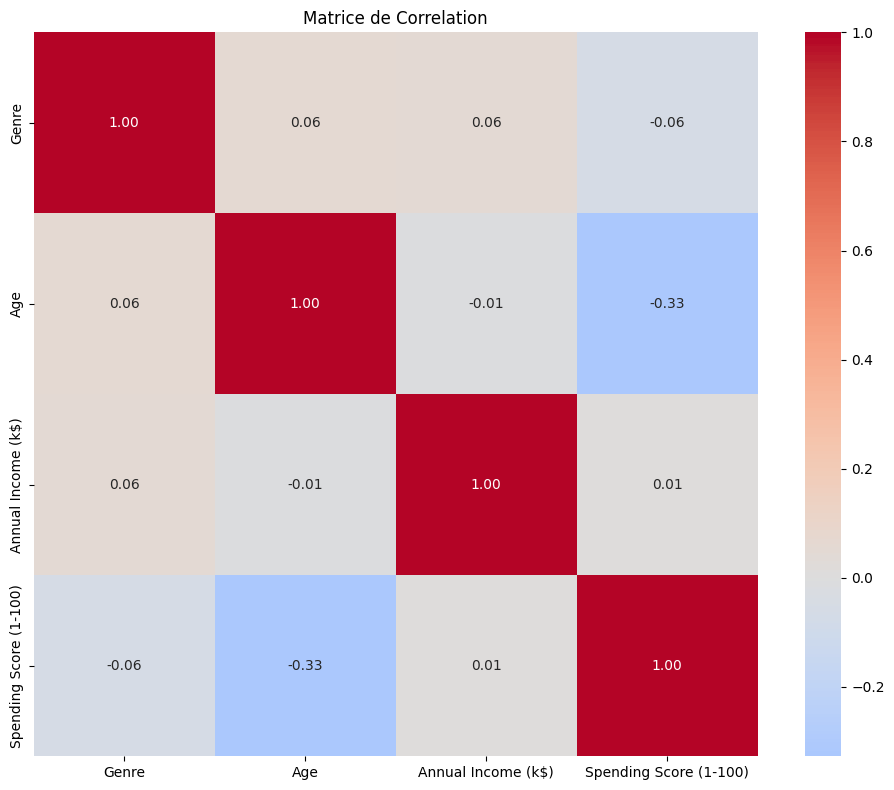

     Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0        1   19                  15                      39        5
1        1   21                  15                      81        5
2        0   20                  16                       6        3
3        0   23                  16                      77        5
4        0   31                  17                      40        3
..     ...  ...                 ...                     ...      ...
195      0   35                 120                      79        4
196      0   45                 126                      28        2
197      1   32                 126                      74        4
198      1   32                 137                      18        2
199      1   30                 137                      83        4

[200 rows x 5 columns]


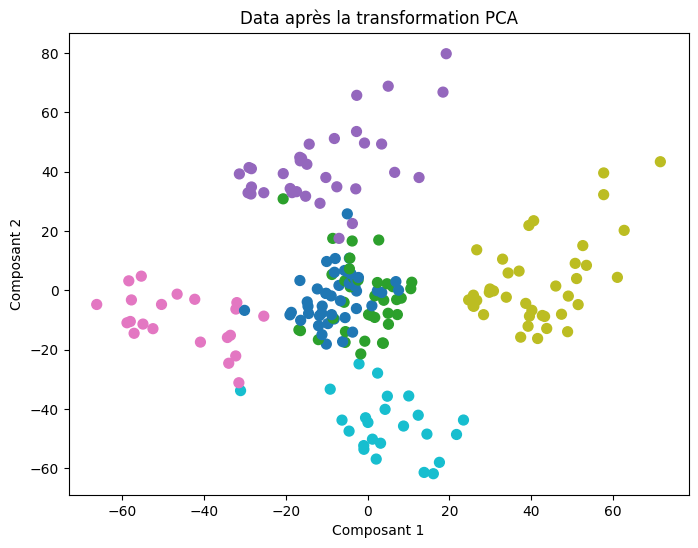

Explained Variance Ratio: [0.4505574  0.44026809]
Total Explained Variance: 0.8908254978610808


In [ ]:
# Segmentation les clients du centre commercial en groupes homogènes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold

#Chargement du CSV et Vérification des valeurs nulles
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')
print(data.isnull().sum())
data = data.drop('CustomerID', axis= 1)
data['Genre'] = data['Genre'].map({'Male': 1, 'Female': 0})

#Standardisation des variables quantitatives
quant_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[quant_cols])

#Affichage dy boxplot et du pairplot par rapport au genre
#sns.boxplot(data)
#sns.pairplot(data, hue='Genre')

#Affichage du heatplot pour voir la correlation des données entre eux
data2 = data.select_dtypes(include=[np.number])
cor_matrix = data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,)
plt.title('Matrice de Correlation')
plt.tight_layout()
plt.show()

k = 6  # tu peux tester plusieurs valeurs
kmeans = KMeans(n_clusters=k, random_state=3)
clusters = kmeans.fit_predict(data_scaled)
data["Cluster"] = clusters
print(data)

#Supression des features non-informatives ou redondantes
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='tab10', s=50, alpha=1)
plt.grid(True)

plt.title("Data après la transformation PCA")
plt.xlabel("Composant 1")
plt.ylabel("Composant 2")
plt.grid()
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))



